
Resumo do dataset: Fato Vendas
Linhas: 10000
Colunas: 6
ClienteID       int64
Valor_Euro    float64
Data           object
CidadeID        int64
ProdutoID       int64
Ano_Mes        object
dtype: object
----------------------------------------

Resumo do dataset: Dim Clientes
Linhas: 10000
Colunas: 2
ClienteID     int64
Nome         object
dtype: object
----------------------------------------

Resumo do dataset: Dim Cidades
Linhas: 10
Colunas: 2
Cidade      object
CidadeID     int64
dtype: object
----------------------------------------

Resumo do dataset: Dim Produtos
Linhas: 8
Colunas: 2
Produto      object
ProdutoID     int64
dtype: object
----------------------------------------

Estatísticas da coluna Valor_Euro:
count    10000.000000
mean       105.556973
std        114.160461
min         15.000000
25%         28.520000
50%         49.560000
75%        138.277500
max        499.740000
Name: Valor_Euro, dtype: float64
----------------------------------------


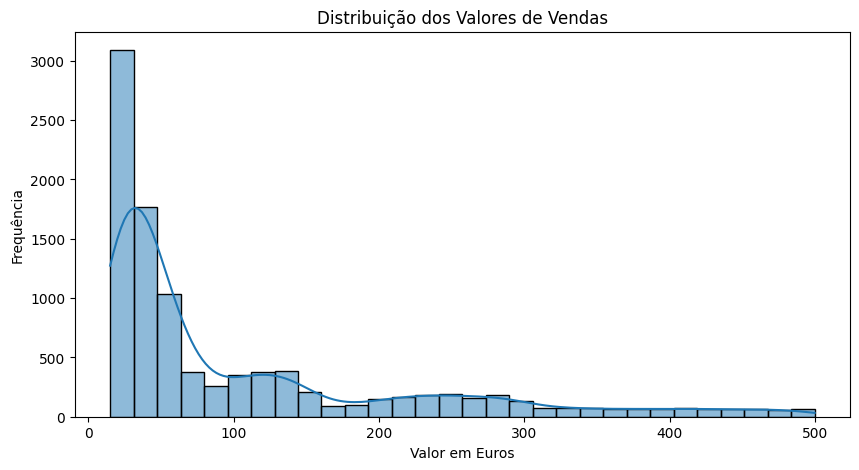

C:\Users\alexm\AppData\Local\Temp\ipykernel_12180\608989243.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=fato_vendas["Cidade"], y=fato_vendas["Valor_Euro"], estimator=sum, palette="viridis")


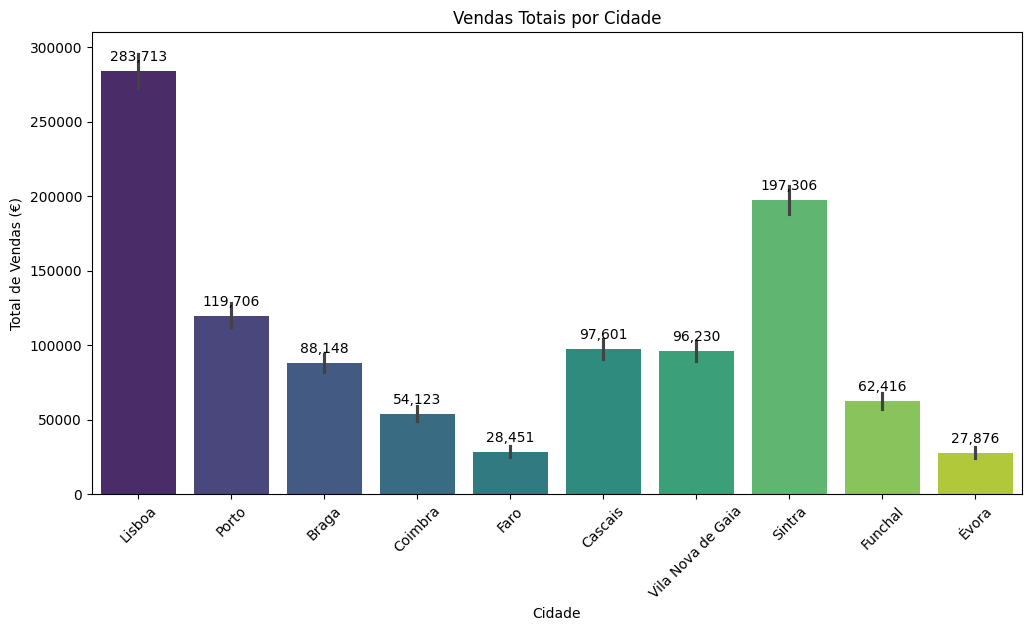

C:\Users\alexm\AppData\Local\Temp\ipykernel_12180\608989243.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=fato_vendas["Produto"], y=fato_vendas["Valor_Euro"], estimator=sum, palette="coolwarm")


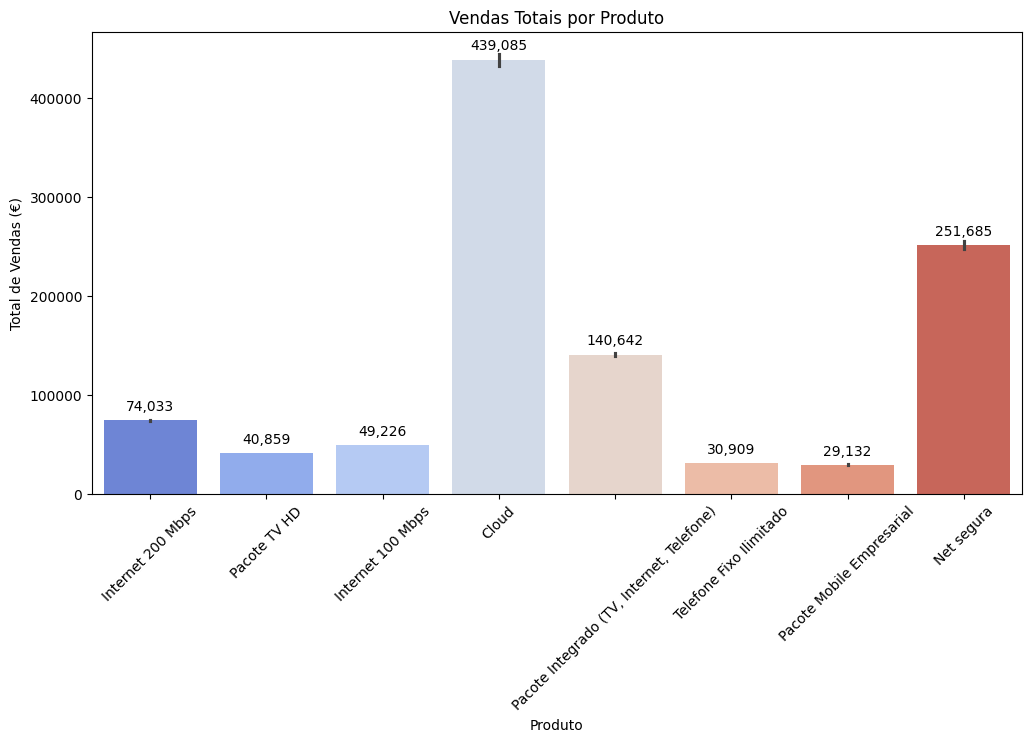

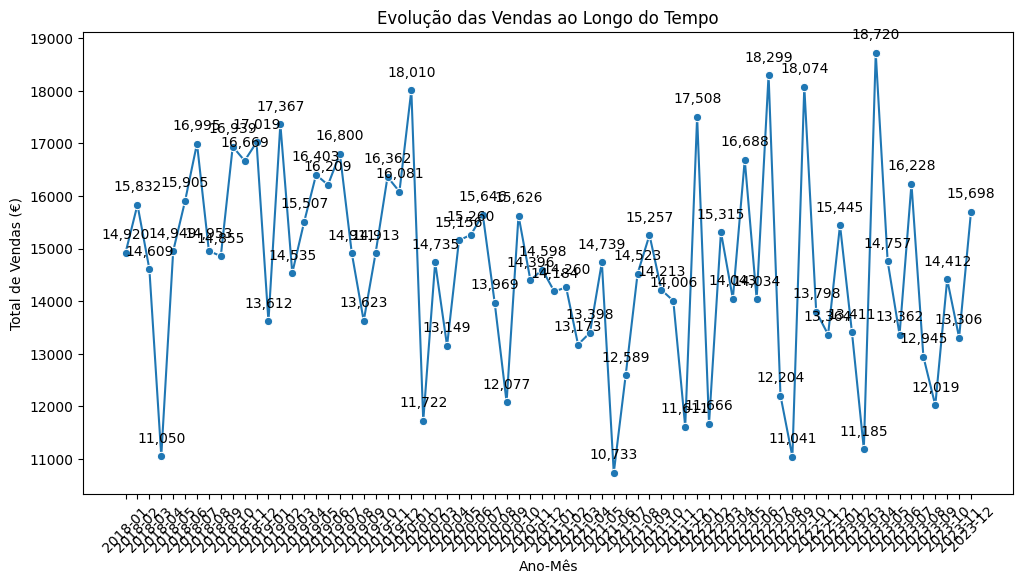

EDA concluída com sucesso!


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
fato_vendas = pd.read_csv(r"C:\Users\alexm\Documents\Altice_DataAnalyst\fato_vendas.csv")
dim_clientes = pd.read_csv(r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_clientes.csv")
dim_cidades = pd.read_csv(r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_cidades.csv")
dim_produtos = pd.read_csv(r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_produtos.csv")

# Exibir informações gerais
def resumo_dados(df, nome):
    print(f"\nResumo do dataset: {nome}")
    print("Linhas:", df.shape[0])
    print("Colunas:", df.shape[1])
    print(df.dtypes)
    print("-" * 40)

# Mostrar resumo de cada tabela
resumo_dados(fato_vendas, "Fato Vendas")
resumo_dados(dim_clientes, "Dim Clientes")
resumo_dados(dim_cidades, "Dim Cidades")
resumo_dados(dim_produtos, "Dim Produtos")

# Estatísticas descritivas
def estatisticas(df, coluna):
    print(f"\nEstatísticas da coluna {coluna}:")
    print(df[coluna].describe())
    print("-" * 40)

estatisticas(fato_vendas, "Valor_Euro")

# Visualização: Histograma de Vendas
plt.figure(figsize=(10, 5))
sns.histplot(fato_vendas["Valor_Euro"], bins=30, kde=True)
plt.title("Distribuição dos Valores de Vendas")
plt.xlabel("Valor em Euros")
plt.ylabel("Frequência")
plt.show()

# Merge para análises
fato_vendas = fato_vendas.merge(dim_cidades, on="CidadeID").merge(dim_produtos, on="ProdutoID")

# Vendas por Cidade com rótulos de valor
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=fato_vendas["Cidade"], y=fato_vendas["Valor_Euro"], estimator=sum, palette="viridis")
plt.xticks(rotation=45)
plt.title("Vendas Totais por Cidade")
plt.ylabel("Total de Vendas (€)")

# Adicionar os rótulos de valor em cada barra
for p in ax1.patches:
    altura = p.get_height()
    ax1.annotate(f'{altura:,.0f}',
                 (p.get_x() + p.get_width() / 2., altura),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.show()

# Vendas por Produto com rótulos de valor
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=fato_vendas["Produto"], y=fato_vendas["Valor_Euro"], estimator=sum, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Vendas Totais por Produto")
plt.ylabel("Total de Vendas (€)")

# Adicionar os rótulos de valor em cada barra
for p in ax2.patches:
    altura = p.get_height()
    ax2.annotate(f'{altura:,.0f}',
                 (p.get_x() + p.get_width() / 2., altura),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.show()

# Evolução das Vendas ao longo do tempo
# Altere de Data_Assinatura para Data
fato_vendas["Data"] = pd.to_datetime(fato_vendas["Data"])
fato_vendas["Ano_Mes"] = fato_vendas["Data"].dt.to_period("M")
vendas_por_mes = fato_vendas.groupby("Ano_Mes")["Valor_Euro"].sum().reset_index()
vendas_por_mes["Ano_Mes"] = vendas_por_mes["Ano_Mes"].astype(str)

plt.figure(figsize=(12, 6))
ax3 = sns.lineplot(data=vendas_por_mes, x="Ano_Mes", y="Valor_Euro", marker="o")
plt.title("Evolução das Vendas ao Longo do Tempo")
plt.ylabel("Total de Vendas (€)")
plt.xlabel("Ano-Mês")
plt.xticks(rotation=45)

# Adicionar anotação para cada ponto
for i, row in vendas_por_mes.iterrows():
    ax3.annotate(f'{row["Valor_Euro"]:,.0f}', (i, row["Valor_Euro"]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

print("EDA concluída com sucesso!")


In [6]:
# Apenas os head() de cada dataset

fato_vendas.head()


,ClienteID,Valor_Euro,Data,CidadeID,ProdutoID,Ano_Mes,Cidade,Produto
0,1,50.50,2021-01-31,1,1,2021-01,Lisboa,Internet 200 Mbps
1,2,28.35,2019-02-24,1,2,2019-02,Lisboa,Pacote TV HD
2,3,61.81,2018-05-11,1,1,2018-05,Lisboa,Internet 200 Mbps
3,4,31.87,2020-08-10,1,3,2020-08,Lisboa,Internet 100 Mbps
4,5,41.22,2022-09-15,1,3,2022-09,Lisboa,Internet 100 Mbps


In [1]:
import pandas as pd

# Caminhos dos arquivos
arquivos = {
    "dim_cidades": r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_cidades.csv",
    "dim_produtos": r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_produtos.csv",
    "dim_clientes": r"C:\Users\alexm\Documents\Altice_DataAnalyst\dim_clientes.csv",
    "fato_vendas": r"C:\Users\alexm\Documents\Altice_DataAnalyst\fato_vendas.csv",
}

# Exibir os primeiros registros de cada arquivo
for nome, caminho in arquivos.items():
    print(f"\n--- {nome} ---\n")
    df = pd.read_csv(caminho, encoding="utf-8", sep=",")
    print(df.head())



--- dim_cidades ---

    Cidade  CidadeID
0   Lisboa         1
1    Porto         2
2    Braga         3
3  Coimbra         4
4     Faro         5

--- dim_produtos ---

                                     Produto  ProdutoID
0                          Internet 200 Mbps          1
1                               Pacote TV HD          2
2                          Internet 100 Mbps          3
3                                      Cloud          4
4  Pacote Integrado (TV, Internet, Telefone)          5

--- dim_clientes ---

   ClienteID       Nome
0          1  Cliente_1
1          2  Cliente_2
2          3  Cliente_3
3          4  Cliente_4
4          5  Cliente_5

--- fato_vendas ---

   ClienteID  Valor_Euro        Data  CidadeID  ProdutoID  Ano_Mes
0          1       50.50  2021-01-31         1          1  2021-01
1          2       28.35  2019-02-24         1          2  2019-02
2          3       61.81  2018-05-11         1          1  2018-05
3          4       31.87  2020-08-10